# Experimental notebook
This is an experimetal Jupyter-Notebook, to test and present the functionality of written code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from stocks.stock import Stock
from analysis.rsi import rsi, rsi_cross_signals
sns.set()

In [2]:
my_stock = Stock('CCC')
my_stock.ohlc.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-30,45.50,47.30,45.38,47.20,184073
2020-10-01,46.04,57.96,46.01,55.34,1471748
2020-10-02,55.04,57.40,53.12,56.54,761297
2020-10-05,57.26,58.58,54.76,55.00,243546
2020-10-06,55.30,56.00,52.34,52.70,233712


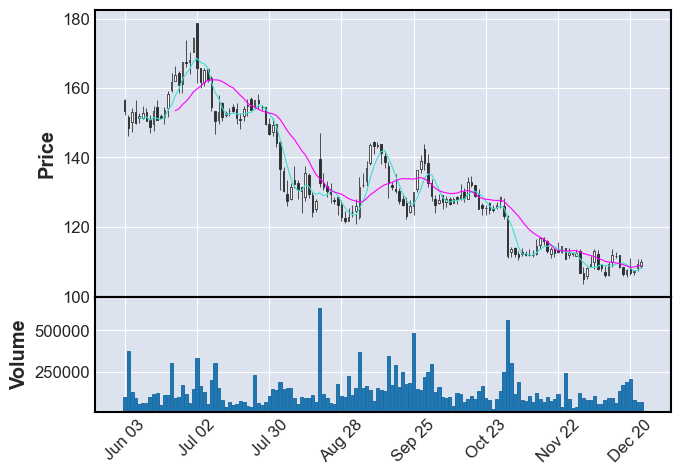

In [3]:
time_range = pd.date_range('2019-06-01', '2019-12-31')
mpf.plot(my_stock.ohlc[my_stock.ohlc.index.isin(time_range)], type='candle', volume=True, mav=(5, 15))

In [4]:
my_stock_rsi = rsi(my_stock.ohlc)
my_stock_rsi

,RSI
Date,
2004-12-02,100.000000
2004-12-03,99.877299
2004-12-06,99.719322
2004-12-07,99.540353
2004-12-08,99.489899
...,...
2020-09-30,38.918290
2020-10-01,59.109329
2020-10-02,61.148246


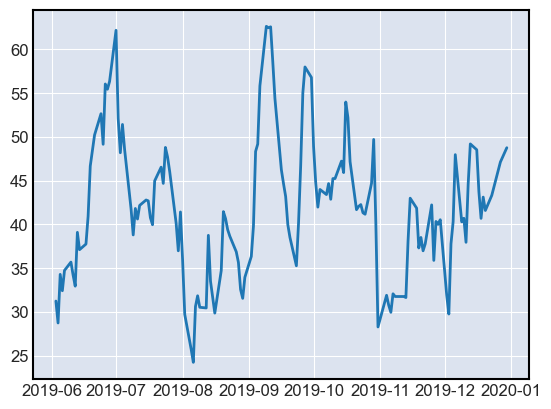

In [5]:
plt.plot(my_stock_rsi[my_stock_rsi.index.isin(time_range)])

In [11]:
my_stock_rsi['Buy'] = rsi_cross_signals(my_stock_rsi, 30, 'onrise')
my_stock_rsi['Sell'] = rsi_cross_signals(my_stock_rsi, 70, 'onrise')